In [66]:
#import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f
from numpy import linalg as LA
from sklearn.decomposition import PCA

In [67]:
class analytical:
    
    def __init__(self,x,y,ytheta,n):
        self.x = x
        self.y = y
        self.n = n
        self.ytheta = ytheta
        self.x_bar = np.mean(x)
        self.y_bar = np.mean(y)

   
        
    def b_hat1(self):
        self.x_bar = np.mean(x)
        self.y_bar = np.mean(y)
        cov_xy = np.sum((self.x - self.x_bar) * (self.y - self.y_bar))
        var_x = np.sum((self.x - self.x_bar)**2)
        b1 = cov_xy / var_x
        
        return b1
        
    
    def b_hat0(self):
        self.x_bar = np.mean(x)
        self.y_bar = np.mean(y)
        b1 = self.b_hat1() 
        b0 = self.y_bar - b1 * self.x_bar
       
        
        return b0
 
    
    def sigma(self):
        b0 =  self.b_hat0()
        b1 = self.b_hat1() 
        residual = self.y -(b0 -(b1*(self.x)))
        sum_residual= np.sum(residual)
       
        sigma = np.sqrt((sum_residual)/(self.n-2))
        
        
        return sigma 
    
    def y_predicted(self):
        bhat1 = self.b_hat1()
        bhat0 = self.b_hat0()
        sigma = self.sigma()
        y_predicted = bhat0 + bhat1 * self.x + sigma
        
        return y_predicted 
            

    
    def r2(self):

        y_predicted = self.y_predicted()
        #sum squared error
        sserr = np.sum((self.y - y_predicted)**2 )
        #sum squared tot
        sstot = np.sum((self.y - self.y_bar)**2)
        r2 = 1 - (sserr/sstot)
        return r2

    def pvalue(self):
       
        dfn, dfd = 1, self.n-2
        
        lower_cdf = 0.001
        upper_cdf = 0.999
        x_lower = f.ppf(lower_cdf, dfn, dfd)
        x_upper = f.ppf(upper_cdf, dfn, dfd)
        
        num_x = self.n
        y_predicted = self.y_predicted()
        #mean squared error
        mse = np.sum((self.y - y_predicted)**2)/dfd
        #mean squared regression
        msr = np.sum((y_predicted - np.mean(y))**2)/1
        
        self.x = np.linspace(x_lower, x_upper,num_x)
        
        
        # get the p-value for a particular F-statistic value
        f_statistic = msr / mse
        p_value = 1.0 - f.cdf(f_statistic, dfn, dfd)
        
        return p_value

    
    def analytical_components(self):
        dictionary = {
            'beta_1': self.b_hat1(),
            'beta_0': self.b_hat0(),
            'sigma': self.sigma(),
            'strength of line': self.r2(),
            'pvalue' : self.pvalue()
        }

    
        return dictionary
    def plot_regression(self):
        y_predicted = self.y_predicted()
        
        fig, ax = plt.subplots()
        ax.scatter(self.x, self.y, color='red', marker='.', linewidth=2)
        ax.plot(self.x, self.ytheta, color='green', label='theoretical',linewidth=2)
        ax.plot(self.x, y_predicted, color='blue', label='predicted', linewidth=2)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title("Linear regression with Predicted and Theoretical Y")
        ax.legend(loc='lower right', fontsize=9)
        

{'beta_1': 1.9340058850010582,
 'beta_0': 0.024525025871305006,
 'sigma': 1.184070232815459,
 'strength of line': 0.643283199778723,
 'pvalue': 3.319435908366586e-07}

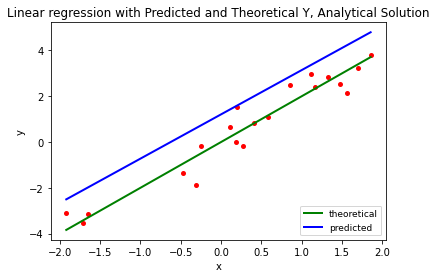

In [68]:
prob1_data =pd.read_csv("/Users/lisaricanek/BINF 6210/linear_regression_test_data.csv")
x = np.array(prob1_data['x'])
y =np.array(prob1_data ['y'])
ytheta = np.array(prob1_data['y_theoretical'])
n=len(x)
r = analytical(x,y,ytheta,n)

r.plot_regression()
r.analytical_components()



In [70]:
class gradient:
    
    def __init__(self,x,y,ytheta,m,theta0,theta1):
        self.x = x
        self.y = y
        self.ytheta = ytheta
        self.m = m
        self.theta0 = theta0
        self.theta1 = theta1 
        
    #define partial derivative of theta_0 
    def theta0_derv(self):
        theta0_derv = 0 
        #self.theta0 = 2
        #self.theta1 = 3
               
        for i in range(len(self.x)):
            theta0_derv = theta0_derv +self.theta0 + self.theta1 * self.x[i] - self.y[i]
        theta0_derv =theta0_derv/self.m
        
        return theta0_derv
        
        
    #define partial derivative of theta 1 
    def theta1_derv(self):
        theta1_derv = 0
    
        for i in range(len(self.x)):
            res= self.theta0 + self.theta1 * self.x[i] - self.y[i]
            theta1_derv = theta1_derv  + res * self.x[i]
        
        theta1_derv_final = theta1_derv / self.m
        
        return theta1_derv_final
    
    
   #getting the cost 
    def get_cost(self,theta0,theta1):
        
        for i in range(len(self.x)):
            current_cost = (theta0 + theta1* self.x[i]- self.y[i])**2
        current_cost = current_cost/(2*self.m)
        return current_cost
        
    def cost(self):
       
        alpha = 0.05 
        num_iterations = 1000
        cost1 = []
       
        stopping_threshold = .00001
        
        weight = []
        theta0 =0
        theta1 =0
        
        for i in range(num_iterations):
            
            theta0_derv = self.theta0_derv()
             
            theta1_derv = self.theta1_derv()
            
            theta0 -= alpha*theta0_derv
           
            theta1 -= alpha*theta1_derv
           
            current_cost = self.get_cost(theta0, theta1)

            if current_cost <=stopping_threshold:
                break
            
            cost1.append(current_cost)
            weight.append(theta1)

        y_predicted = theta0 + theta1 * self.x
   

        return cost1, weight, y_predicted
    
        
   
        
    def gradient_components(self):
        dictionary = {
            'Theta 0': self.theta0_derv(),
            'Theta 1': self.theta1_derv(),
            'Cost': self.cost()[0]
            
        }
        
        return dictionary
    
    #plotting the cost and weight 
    def gradient_plot(self):
        cost = self.cost()[0]
        weight = self.cost()[1]
        fig, ax = plt.subplots()
        ax.plot(weight, cost)
        ax.set_xlabel('Weight')
        ax.set_ylabel('Cost')
        ax.set_title('Gradient Descent')
    
        
    def plot_regression(self):
        y_predicted = self.cost()[2]
        fig, ax = plt.subplots()
        ax.scatter(self.x, self.y, color='red', marker='.', linewidth=2)
        ax.plot(self.x, self.ytheta, color='green', label='theoretical',linewidth=2)
        ax.plot(self.x, y_predicted, color='blue', label='predicted', linewidth=2)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title("Linear regression with Predicted and Theoretical Y)
        ax.legend(loc='lower right', fontsize=9)
    
        
        

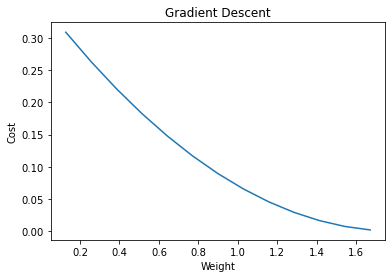

In [71]:
prob2_data =pd.read_csv("/Users/lisaricanek/BINF 6210/linear_regression_test_data.csv")
x = np.array(prob2_data['x'])
y =np.array(prob2_data ['y'])
ytheta = np.array(prob2_data['y_theoretical'])
m =len(x)
r = gradient(x,y,ytheta,m,0,0)

r.gradient_plot()



{'Theta 0': -0.6554350681791499,
 'Theta 1': -2.569564966611959,
 'Cost': [0.30913067961283625,
  0.26331040574897296,
  0.2211636473431861,
  0.18269040439547565,
  0.14789067690584143,
  0.11676446487428364,
  0.08931176830080216,
  0.06553258718539706,
  0.045426921528068265,
  0.028994771328815793,
  0.016236136587639713,
  0.007151017304539961,
  0.0017394134795165543]}

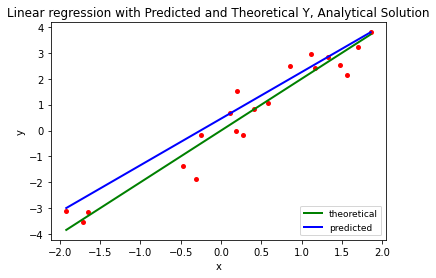

In [72]:
r.plot_regression()
r.gradient_components()

In [40]:
class PCA:
 
    def __init__(self, x ):
        
        self.x = x
      

            
    #standarize data 
    def pca (self):
        #standarized_data = StandardScaler().fit_transform(self.x)
        mean = np.mean(self.x, axis=0)
        
#(1). Do mean-centering.

        centered_data = self.x - mean
       
      
      #read the file in as a df and try to use df.cov

#(2). Compute the covariance matrix using numpy.cov().
 
        centered_data = self.x - mean
        cov_mat = np.cov(centered_data, rowvar=False)
       
        return cov_mat
    
    def eigen(self):
        cov_mat = self.pca()
        eigenvalues, eigenvectors = LA.eig(cov_mat)
       
        return  eigenvectors
    def values(self):
        cov_mat = self.pca()
        eigenvalues, eigenvectors = LA.eig(cov_mat)
        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalue = eigenvalues[sorted_index]
        sorted_eigenvectors = eigenvectors[:, sorted_index]
     
        return  sorted_eigenvalue
    def sort_eigenvector(self):
        cov_mat = self.pca()
        eigenvalues, eigenvectors = LA.eig(cov_mat)
        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalue = eigenvalues[sorted_index]
        sorted_eigenvectors = eigenvectors[:, sorted_index]
        

        return sorted_eigenvectors 
        
    def projection(self):
        eigenvectors = self.sort_eigenvector()
        project_data = np.dot(self.x, eigenvectors)
        return project_data
        
    
    def score_plot(self):
        project_data = self.projection()
        #score plot
        PC1 = project_data[:, 0]
        PC2 = project_data[:, 1]
       
        plt.scatter(PC1, PC2)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA Scores Plot')
        plt.show()
    def loading_plot(self):
        eigenvectors = self.eigen()
        num_of_variables = self.x.shape[1]
        variable_names = self.x.columns.values
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(eigenvectors[0,: ], eigenvectors[1, :],
                color='blue')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_title('loadings plot')

        for i in range(num_of_variables):
            ax.text(eigenvectors[0, i], eigenvectors[1, i], variable_names[i])
        fig.show()
        
    def scree_plot(self):
        sorted_eigenvalues = self.values()
    
        variance_explained = (sorted_eigenvalues / sum(sorted_eigenvalues))*100
        print("Variance explained:")
        print(variance_explained)
           
        plt.scatter(range(2),variance_explained[0:2])
        #plt.scatter(variance_explained, variance_explained, color='blue')
        plt.title('scree plot')
        plt.xlabel('PC index')
        plt.ylabel('percent variance explained')
        
        
   
        
    def project_pc1(self):
        PC = self.sort_eigenvector()
        x= self.x.iloc[:,0]
        y= self.x.iloc[:,1]
        fig, ax = plt.subplots()
        ax.scatter(x,y, color='blue')
        ax.plot([0, -20*PC[0, 0]], [0, -20*PC[1, 0]], color='red', linewidth=3, label='PC 1')
        ax.plot([0, -20 * PC[0, 1]], [0, -20 *PC[1, 1]], color='green', linewidth=3, label='PC 2')
        ax.set_title('raw data and PC axis')
        ax.set_aspect('equal', 'box')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.legend()
        
    


   

In [56]:
prob1_data =pd.read_csv("/Users/lisaricanek/BINF 6210/linear_regression_test_data.csv")
pca = PCA(prob1_data)
x = np.array(prob1_data['x'])
y =np.array(prob1_data ['y'])
ytheta = np.array(prob1_data['y_theoretical'])
n=len(x)
r = analytical(x,y,ytheta,n)
y_predicted = r.y_predicted()

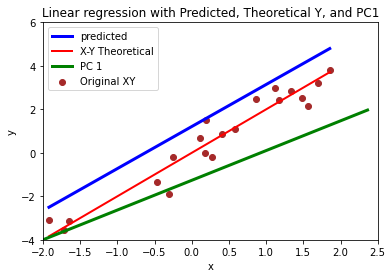

In [64]:
PC = PCA(prob1_data).eigen()


fig, ax = plt.subplots()
ax.scatter(x2,y, color='brown', label='Original XY')
ax.plot(x2, y_predicted, color='blue', label='predicted', linewidth=3)
ax.plot(x2,y_theoretical, color='red', label='X-Y Theoretical', linewidth=2)
ax.plot([-2, -5*PC[0, 1]], [-4, -12*PC[1, 0]], color='green', linewidth=3, label='PC 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2,2.5)
ax.set_ylim(-4,6)
ax.set_title("Linear regression with Predicted, Theoretical Y, PC1, and Orginal data")
ax.legend()